In [2]:
from urllib import request
resp = request.urlopen('https://movie.douban.com/nowplaying/hangzhou/')
html_data = resp.read().decode('utf-8')

In [26]:
# print(html_data)

In [10]:
from bs4 import BeautifulSoup as bs
soup = bs(html_data, 'html5lib')
nowplaying_movie = soup.find_all('div', id = 'nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_ = 'list-item')

In [27]:
# print(nowplaying_movie_list[0])

In [13]:
nowplaying_list = []
for item in nowplaying_movie_list:
    nowplaying_dict = {}
    nowplaying_dict['id'] = item['data-subject']
    for tag_img_item in item.find_all('img'):
        nowplaying_dict['name'] = tag_img_item['alt']
        nowplaying_list.append(nowplaying_dict)

In [14]:
print(nowplaying_list)

[{'id': '24773958', 'name': '复仇者联盟3：无限战争'}, {'id': '26968024', 'name': '我是你妈'}, {'id': '26683723', 'name': '后来的我们'}, {'id': '26610786', 'name': '战犬瑞克斯'}, {'id': '26774033', 'name': '幕后玩家'}, {'id': '26420932', 'name': '巴霍巴利王2：终结'}, {'id': '27608425', 'name': '亲爱的，我要和别人结婚了'}, {'id': '4920389', 'name': '头号玩家'}, {'id': '30183489', 'name': '小公主艾薇拉与神秘王国'}, {'id': '26430636', 'name': '狂暴巨兽'}, {'id': '27065636', 'name': '七号公馆'}, {'id': '30187395', 'name': '午夜十二点'}, {'id': '26924141', 'name': '低压槽：欲望之城'}, {'id': '5330387', 'name': '青年马克思'}, {'id': '26935777', 'name': '玛丽与魔女之花'}, {'id': '26640371', 'name': '犬之岛'}, {'id': '26868408', 'name': '黄金花'}, {'id': '26588783', 'name': '冰雪女王3：火与冰'}, {'id': '26942631', 'name': '起跑线'}, {'id': '26682831', 'name': '天梦'}, {'id': '25881611', 'name': '战神纪'}, {'id': '26691361', 'name': '21克拉'}, {'id': '27200820', 'name': '凌晨两点半'}]


In [122]:
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[0]['id'] + '/comments' + '?' + 'start=0' + '&limit=9900000'
resp = request.urlopen(requrl)
html_data = resp.read().decode('utf-8')
soup = bs(html_data, 'html5lib')
comment_div_lits = soup.find_all('div', class_ = 'comment')
# requrl = 'https://movie.douban.com/subject/' + nowplaying_list[0]['id'] + '/comments' +'?' +'start=0' + '&limit=20' 
# resp = request.urlopen(requrl) 
# html_data = resp.read().decode('utf-8') 
# soup = bs(html_data, 'html.parser') 
# comment_div_lits = soup.find_all('div', class_='comment')

In [123]:
eachCommentlist = []
for item in comment_div_lits:
    if item.find_all('p')[0].string is not None:
        eachCommentlist.append(item.find_all('p')[0].string)

In [124]:
print(eachCommentlist)

[' 混沌初开，宇宙出现了六颗象征尊贵身份的宝石，一旦集齐就有毁天灭地的能力。它们分别是QQ空间黄钻（心灵宝石）、QQ秀红钻（现实宝石）、QQ炫舞紫钻（力量宝石）、QQ游戏蓝钻（空间宝石）、QQ音乐绿钻（时间宝石）、QQ橙钻（灵魂宝石）。为了得到六大宝石，灭霸终于对马化腾，哦不，复联下手了。\n        ', ' 《复联3》讲的是一个猪队友顺风浪了一波，然后被团灭了的故事。呵呵，卡魔拉真倒霉，爸爸是个疯子，男朋友是个傻子。\n        ', ' 大家好，我是灭霸，我的手套被扣在海关了，急需要200元交罚款，如果你5月11愿意发红包给我，我保证在打响指时你会活下来。我代表我们泰坦星下发红头文件:赶在2019面之前务必要让全宇宙的人口降低一半，宇宙的人均GDP才能翻一番，实现又好又快发展。这是千年大计、宇宙大事！\n        ', ' 为什么不砍手？？？？？？？\n        ', ' 一顿操作猛如虎 一个指响秒变土\n        ', ' 景甜出场的那一瞬间真的太震撼了，打趴下灭霸的时候全场都起立鼓掌了，美队把自己的盾牌给了景甜希望她能做下一任美国队长，景甜拒绝了并且亮出了胸口的红旗说i am Chinese! 电影院里掌声久久不息…\n        ', ' 灭霸是一个有情怀的无产主义者，不惜牺牲此生最爱来整治这个混乱而拥挤不堪的宇宙，整治完了也不是要搞什么奴隶制自己当皇帝什么的，而是隐居深山老林看着夕阳感叹人生无常，说不定有空再种种菜养养鸡什么的。以随机的方式减去一半的人口也体现了其公平性和创新性，简直就是boss里面不可多得的楷模。\n        ', ' 韩国今天看完，无剧透：1：彩蛋只有字幕全部结束后的1个。2：非常震撼，刺激，过瘾，喝可乐的世界有，需要压惊，但吃爆米花的时间没有。3：漫威粉必看，非常燃。4：纸巾有的人会需要。5：反派人设非常到位，竟然有深度。6：进场前3小时别饮水。7：特效吊炸天。8：罗素兄弟太强。9：瑕不掩瑜。\n        ', ' 一颗宝石你们打不过，两颗宝石你们打不过，然后人家就有六颗宝石了，你们怎么打？编剧不知道怎么让你们打赢，干脆拖到下一部了。\n        ', ' 下一部：《复仇者联盟：逆转未来》\n        ', ' 两个福尔摩斯跑来纽约玩Cosplay不务正业，案子不用查了吗

In [125]:
comments = ''
for k in range(len(eachCommentlist)):
    comments = comments + (str(eachCommentlist[k])).strip()

In [126]:
print(comments)

混沌初开，宇宙出现了六颗象征尊贵身份的宝石，一旦集齐就有毁天灭地的能力。它们分别是QQ空间黄钻（心灵宝石）、QQ秀红钻（现实宝石）、QQ炫舞紫钻（力量宝石）、QQ游戏蓝钻（空间宝石）、QQ音乐绿钻（时间宝石）、QQ橙钻（灵魂宝石）。为了得到六大宝石，灭霸终于对马化腾，哦不，复联下手了。《复联3》讲的是一个猪队友顺风浪了一波，然后被团灭了的故事。呵呵，卡魔拉真倒霉，爸爸是个疯子，男朋友是个傻子。大家好，我是灭霸，我的手套被扣在海关了，急需要200元交罚款，如果你5月11愿意发红包给我，我保证在打响指时你会活下来。我代表我们泰坦星下发红头文件:赶在2019面之前务必要让全宇宙的人口降低一半，宇宙的人均GDP才能翻一番，实现又好又快发展。这是千年大计、宇宙大事！为什么不砍手？？？？？？？一顿操作猛如虎 一个指响秒变土景甜出场的那一瞬间真的太震撼了，打趴下灭霸的时候全场都起立鼓掌了，美队把自己的盾牌给了景甜希望她能做下一任美国队长，景甜拒绝了并且亮出了胸口的红旗说i am Chinese! 电影院里掌声久久不息…灭霸是一个有情怀的无产主义者，不惜牺牲此生最爱来整治这个混乱而拥挤不堪的宇宙，整治完了也不是要搞什么奴隶制自己当皇帝什么的，而是隐居深山老林看着夕阳感叹人生无常，说不定有空再种种菜养养鸡什么的。以随机的方式减去一半的人口也体现了其公平性和创新性，简直就是boss里面不可多得的楷模。韩国今天看完，无剧透：1：彩蛋只有字幕全部结束后的1个。2：非常震撼，刺激，过瘾，喝可乐的世界有，需要压惊，但吃爆米花的时间没有。3：漫威粉必看，非常燃。4：纸巾有的人会需要。5：反派人设非常到位，竟然有深度。6：进场前3小时别饮水。7：特效吊炸天。8：罗素兄弟太强。9：瑕不掩瑜。一颗宝石你们打不过，两颗宝石你们打不过，然后人家就有六颗宝石了，你们怎么打？编剧不知道怎么让你们打赢，干脆拖到下一部了。下一部：《复仇者联盟：逆转未来》两个福尔摩斯跑来纽约玩Cosplay不务正业，案子不用查了吗？日啊这哪是妇联3，分明就是灭霸传啊！二十多个超级英雄三条故事线，全部在给灭霸打牙祭。虫铁最可爱，锤哥真正帅，星爵搅屎棍，结局看不懂！加上彩蛋还是看不懂！（没错我是鸵鸟我不相信！我！不！相！信！）《灭霸：后来我什么都有了，但是没有了我们》万磁王：OMG，他居然把全世界最强的六块宝石放在一个金属手套上。居然

In [127]:
import re

pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)

In [128]:
print(cleaned_comments)

混沌初开宇宙出现了六颗象征尊贵身份的宝石一旦集齐就有毁天灭地的能力它们分别是空间黄钻心灵宝石秀红钻现实宝石炫舞紫钻力量宝石游戏蓝钻空间宝石音乐绿钻时间宝石橙钻灵魂宝石为了得到六大宝石灭霸终于对马化腾哦不复联下手了复联讲的是一个猪队友顺风浪了一波然后被团灭了的故事呵呵卡魔拉真倒霉爸爸是个疯子男朋友是个傻子大家好我是灭霸我的手套被扣在海关了急需要元交罚款如果你月愿意发红包给我我保证在打响指时你会活下来我代表我们泰坦星下发红头文件赶在面之前务必要让全宇宙的人口降低一半宇宙的人均才能翻一番实现又好又快发展这是千年大计宇宙大事为什么不砍手一顿操作猛如虎一个指响秒变土景甜出场的那一瞬间真的太震撼了打趴下灭霸的时候全场都起立鼓掌了美队把自己的盾牌给了景甜希望她能做下一任美国队长景甜拒绝了并且亮出了胸口的红旗说电影院里掌声久久不息灭霸是一个有情怀的无产主义者不惜牺牲此生最爱来整治这个混乱而拥挤不堪的宇宙整治完了也不是要搞什么奴隶制自己当皇帝什么的而是隐居深山老林看着夕阳感叹人生无常说不定有空再种种菜养养鸡什么的以随机的方式减去一半的人口也体现了其公平性和创新性简直就是里面不可多得的楷模韩国今天看完无剧透彩蛋只有字幕全部结束后的个非常震撼刺激过瘾喝可乐的世界有需要压惊但吃爆米花的时间没有漫威粉必看非常燃纸巾有的人会需要反派人设非常到位竟然有深度进场前小时别饮水特效吊炸天罗素兄弟太强瑕不掩瑜一颗宝石你们打不过两颗宝石你们打不过然后人家就有六颗宝石了你们怎么打编剧不知道怎么让你们打赢干脆拖到下一部了下一部复仇者联盟逆转未来两个福尔摩斯跑来纽约玩不务正业案子不用查了吗日啊这哪是妇联分明就是灭霸传啊二十多个超级英雄三条故事线全部在给灭霸打牙祭虫铁最可爱锤哥真正帅星爵搅屎棍结局看不懂加上彩蛋还是看不懂没错我是鸵鸟我不相信我不相信灭霸后来我什么都有了但是没有了我们万磁王他居然把全世界最强的六块宝石放在一个金属手套上居然没有让说完就让他领饭盒了洛基卡魔拉星爵奇异博士绯红女巫其实都有机会阻止灭霸成为钻皇可生死抉择之时他们还是自私地将所爱之人的安危置于恪守原则拯救世界的重要性之上他们的爱成为被利用的弱点而灭霸截然相反他并非绝情之人但他个人的爱恨只能为理想让步所以我居然觉得灭霸的人设是最复杂最带感的计生委奋斗史我中途幻想的这片的结尾是灭霸成功打响指宇宙的一半开始毁灭第一个消失的就是灭霸自己洛基开局反野被

In [129]:
import jieba
import pandas as pd

segment = jieba.lcut(cleaned_comments)
words_df = pd.DataFrame({'segment': segment})

In [130]:
words_df.head()

,segment
0,混沌初开
1,宇宙
2,出现
3,了
4,六颗


In [131]:
stopwords = pd.read_csv('stopwords.txt', index_col=False, quoting=3, sep = "\n",names = ['stopword'], encoding = 'utf-8')
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]

In [132]:
words_df.head()

,segment
0,混沌初开
1,宇宙
4,六颗
5,象征
6,尊贵


In [133]:
import numpy as np
words_stat = words_df.groupby(by = ['segment'])['segment'].agg({"计数": np.size})
words_stat = words_stat.reset_index().sort_values(by = ["计数"], ascending = False)

In [134]:
words_stat.head()

,segment,计数
114,宝石,12
204,灭霸,9
301,钻,5
16,不,5
109,宇宙,5


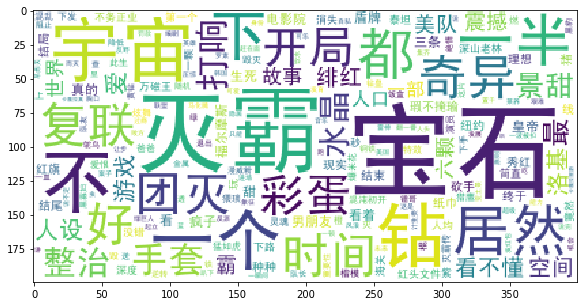

In [25]:
import matplotlib.pyplot as plt 
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
import codecs
from pylab import mpl

wordcloud = WordCloud(font_path= "SimHei.ttf", background_color = "white", max_font_size = 80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key, word_frequence[key])
    word_frequence_list.append(temp)

# print(word_frequence_list)
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [112]:
# import matplotlib
# matplotlib.matplotlib_fname()
# Summary:
# Issue: matplotlib cannot show Chinese Font. 
# reference: https://foofish.net/matplotlib_mess.html

'/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'